# Enron Emails - Data Cleaning, Analysis and Visualization <br> (Ameer Abu Ganeem)

## Data Cleaning and Formatting

In [52]:
import pandas as pd
import re
from IPython.display import display
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


Let's take a quick look at the appearance of the data.

In [53]:
df = pd.read_csv('emails.csv')
print(df.loc[6009]['message'])

Message-ID: <23341652.1075857629787.JavaMail.evans@thyme>
Date: Mon, 14 May 2001 06:50:00 -0700 (PDT)
From: michael.gapinski@ubspainewebber.com
To: john.arnold@enron.com
Subject: Additional offerings to round out your portfolio
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: "Gapinski, Michael" <michael.gapinski@ubspainewebber.com>
X-To: "Arnold John (E-mail)" <john.arnold@enron.com>
X-cc: 
X-bcc: 
X-Folder: \John_Arnold_Jun2001\Notes Folders\Discussion threads
X-Origin: Arnold-J
X-FileName: Jarnold.nsf

John -

I left a message about this last week, but wanted to follow-up with
additional information for your review.  We have three offerings currently
available (or coming soon) that I feel would compliment the small/mid cap
and fixed income exposure you already have through Redwood, Sequoia, and
Willow.

Quantitative Allocation, LLC: Integrates four quantitative investment models
to drive aggressive (and potentially leveraged) asset

Displaying the "unbeautified" format of the record is crucial as it helps us gain a clearer understanding of how to parse the data(looking for special characters).

In [54]:
df.loc[86]['message']

"Message-ID: <12599900.1075855689029.JavaMail.evans@thyme>\nDate: Fri, 25 Aug 2000 03:30:00 -0700 (PDT)\nFrom: phillip.allen@enron.com\nTo: brad.mcsherry@enron.com\nSubject: \nCc: john.lavorato@enron.com, hunter.shively@enron.com\nMime-Version: 1.0\nContent-Type: text/plain; charset=us-ascii\nContent-Transfer-Encoding: 7bit\nBcc: john.lavorato@enron.com, hunter.shively@enron.com\nX-From: Phillip K Allen\nX-To: Brad McSherry\nX-cc: John J Lavorato, Hunter S Shively\nX-bcc: \nX-Folder: \\Phillip_Allen_Dec2000\\Notes Folders\\'sent mail\nX-Origin: Allen-P\nX-FileName: pallen.nsf\n\nBrad,\n\n With regard to Tori Kuykendall, I would like to promote her to commercial \nmanager instead of converting her from a commercial support manager to an \nassociate.  Her duties since the beginning of the year have been those of a \ncommercial manager.  I have no doubt that she will compare favorably to \nothers in that category at year end.  \n\n Martin Cuilla on the central desk is in a similiar situat

Based on both the "beautified" and "unbeautified" versions, it can be concluded that the headers of the email, such as Subject, From, To, etc., can be separated by a single newline, while the body of the message can be separated by two newlines.

In [55]:
# split by two new-lines to get the email body or the headers
def get_email_data(msg_idx,body = True):
  full_email = df.loc[msg_idx]['message'].split('\n\n')
  return (''.join(full_email[1:])) if body else (''.join(full_email[:1]))


# doesn't work for some emails when there are many recepients.
def get_cols_names(idx):
  meta_data = get_email_data(idx,False)
  return [h.split(':')[0] for h in (meta_data.split('\n'))]



def get_substring_between_words(string, word1, word2,idx):
    start_index = string.find(word1)
    end_index = string.find(word2)
    if start_index != -1 and end_index != -1:
        start_index += len(word1)  # Adjust the start index to exclude the word itself
        string =  string[start_index:end_index].strip()  # Extract the substring and remove leading/trailing spaces
        if word1 == 'From:' and word2=='To:' and '\n' in string: #Some of emails dont have 'To' Field (I noticed this further but fixed it here, because looping again to fix all of them takes so much time)
          string = string.split('\n')[0]
        return string
    else:
        return 'No Substring Found'


def get_row(idx,cols):
  meta = get_email_data(idx,False)
  body = get_email_data(idx)
  row = []
  for first,second in zip(cols[:-1],cols[1:]):
    string = get_substring_between_words(meta,first+':',second+':',idx)
    if string != 'No Substring Found':
      row.append(string)
    else:
      return []

  row.append(meta.split('\n')[-1].split(': ')[-1]) #to get the X-FileName
  row.append(body)
  return row

def build_dataset():
  table = []
  cols = get_cols_names(0)
  exceptions = []
  for idx in range(len(df)):
     row = get_row(idx,cols)
     if row:
      table.append(row)
     else:
      exceptions.append(idx)

  return table, exceptions

print(f'The columns: \n {get_cols_names(0)}')


The columns: 
 ['Message-ID', 'Date', 'From', 'To', 'Subject', 'Mime-Version', 'Content-Type', 'Content-Transfer-Encoding', 'X-From', 'X-To', 'X-cc', 'X-bcc', 'X-Folder', 'X-Origin', 'X-FileName']


In [56]:
table, exceptions = build_dataset()
print(f'Parsed Successfully: {len(table)}')
print(f'Parsing Failed: {len(exceptions)}')

cols = get_cols_names(0)
cols.append('Body')
df2 = pd.DataFrame(table,columns=cols)
df2.head()

Parsed Successfully: 517398
Parsing Failed: 3


Message-ID  \
0  <18782981.1075855378110.JavaMail.evans@thyme>   
1  <15464986.1075855378456.JavaMail.evans@thyme>   
2  <24216240.1075855687451.JavaMail.evans@thyme>   
3  <13505866.1075863688222.JavaMail.evans@thyme>   
4  <30922949.1075863688243.JavaMail.evans@thyme>   

                                    Date                     From  \
0  Mon, 14 May 2001 16:39:00 -0700 (PDT)  phillip.allen@enron.com   
1   Fri, 4 May 2001 13:51:00 -0700 (PDT)  phillip.allen@enron.com   
2  Wed, 18 Oct 2000 03:00:00 -0700 (PDT)  phillip.allen@enron.com   
3  Mon, 23 Oct 2000 06:13:00 -0700 (PDT)  phillip.allen@enron.com   
4  Thu, 31 Aug 2000 05:07:00 -0700 (PDT)  phillip.allen@enron.com   

                        To    Subject Mime-Version  \
0     tim.belden@enron.com                     1.0   
1  john.lavorato@enron.com        Re:          1.0   
2   leah.arsdall@enron.com   Re: test          1.0   
3    randall.gay@enron.com                     1.0   
4     greg.piper@enron.com  Re: Hello          1.0   

                   Content-Type Content-Transfer-Encoding           X-From  \
0  text/plain; charset=us-ascii                      7bit  Phillip K Allen   
1  text/plain; charset=us-ascii                      7bit  Phillip K Allen   
2  text/plain; charset=us-ascii                      7bit  Phillip K Allen   
3  text/plain; charset=us-ascii                      7bit  Phillip K Allen   
4  text/plain; charset=us-ascii                      7bit  Phillip K Allen   

                                                X-To X-cc X-bcc  \
0           Tim Belden <Tim Belden/Enron@EnronXGate>              
1  John J Lavorato <John J Lavorato/ENRON@enronXg...              
2                                   Leah Van Arsdall              
3                                      Randall L Gay              
4                                         Greg Piper              

                                            X-Folder X-Origin  \
0  \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...  Allen-P   
1  \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...  Allen-P   
2    \Phillip_Allen_Dec2000\Notes Folders\'sent mail  Allen-P   
3    \Phillip_Allen_Dec2000\Notes Folders\'sent mail  Allen-P   
4    \Phillip_Allen_Dec2000\Notes Folders\'sent mail  Allen-P   

                    X-FileName  \
0  pallen (Non-Privileged).pst   
1  pallen (Non-Privileged).pst   
2                   pallen.nsf   
3                   pallen.nsf   
4                   pallen.nsf   

                                                Body  
0                              Here is our forecast   
1  Traveling to have a business meeting takes the...  
2                     test successful.  way to go!!!  
3  Randy, Can you send me a schedule of the salar...  
4                Let's shoot for Tuesday at 11:45.

Considering that only three rows were not parsed, which is a relatively small number, it seems reasonable to disregard those rows as they likely have minimal contribution to the overall data.

To ensure the validity of the values, particularly the headers, it is advisable to perform a simple check. It is reasonable to assume that header values should not contain newline characters ('\n'). We can verify if any header values indeed have this character and then reprocess them accordingly to maintain the integrity of the data.

In [57]:
for col in cols:
  result= df2[col].str.contains('\n')
  if result.any():
    print(f'column:{col},\n examples:\n {result[result][0:3]}')
    print()

column:To,
 examples:
 63     True
80     True
118    True
Name: To, dtype: bool

column:Subject,
 examples:
 66     True
71     True
161    True
Name: Subject, dtype: bool

column:Content-Transfer-Encoding,
 examples:
 86     True
128    True
172    True
Name: Content-Transfer-Encoding, dtype: bool

column:Body,
 examples:
 1    True
3    True
6    True
Name: Body, dtype: bool



In [58]:
print(df2.loc[63]['To'])
print('////////')
print(df2.loc[172]['Subject'])
print('////////')
print(df2.loc[86]['Content-Transfer-Encoding'])


thomas.martin@enron.com, mike.grigsby@enron.com, keith.holst@enron.com, 
	jay.reitmeyer@enron.com, frank.ermis@enron.com
////////
Re: Unocal WAHA Storage
Cc: mike.grigsby@enron.com
////////
7bit
Bcc: john.lavorato@enron.com, hunter.shively@enron.com


From the provided sample, it is evident that there are additional headers we didn't consider initially, such as 'Bcc' and 'Cc'. It is worth noting that the 'RE:' in the subject line is automatically added when replying to an email. It appears that some emails have these headers, while others do not. It is advisable to consider incorporating these headers in the future. 
<br>
<br>
**Please note** that the anomalies mentioned were identified based on the provided samples at locations 172 and 86. It is possible that further processing may uncover similar anomalies, but it is not guaranteed. Therefore, it is important to be aware that values for 'Bcc' and 'Cc' might be contained within other header values, potentially going unnoticed without careful examination.

Let's examine the DataFrame we have constructed thus far to identify any missing values and gain an overview. It's important to note that we won't consider empty strings as missing values.

In [59]:
def data_info(df):

    """Return a dataframe about the information and missing values of the columns"""

    column_name = []
    dtype = []
    count = []
    unique = []
    missing_values = []

    for item in df.columns:
        column_name.append(item)
        dtype.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing_values.append(df[item].isna().sum())

    output = pd.DataFrame({'column_name': column_name,
                           'dtype': dtype,
                           'count': count,
                           'unique': unique,
                           'missing_values': missing_values})

    return output

data_info(df2)


column_name   dtype   count  unique  missing_values
0                  Message-ID  object  517398  517398               0
1                        Date  object  517398  224127               0
2                        From  object  517398   20328               0
3                          To  object  517398   58563               0
4                     Subject  object  517398  176136               0
5                Mime-Version  object  517398       1               0
6                Content-Type  object  517398       2               0
7   Content-Transfer-Encoding  object  517398   30029               0
8                      X-From  object  517398   27985               0
9                        X-To  object  517398   73532               0
10                       X-cc  object  517398   33701               0
11                      X-bcc  object  517398     132               0
12                   X-Folder  object  517398    5335               0
13                   X-Origin  object  517398     259               0
14                 X-FileName  object  517398     429               0
15                       Body  object  517398  248794               0

It appears that the 'Mime-Version' column contains only one value and does not contribute significantly to the data. Therefore, it can be dropped from the DataFrame. Additionally, the 'Content-Type' column can have values like 'text/plain; charset=us-ascii' or 'text/plain; charset=ANSI_X3.4-1968', which primarily indicate the encoding of the message body and are not directly relevant to human understanding or analysis. Hence, it is advisable to drop the 'Content-Type' column as well. Please note that the irrelevant columns will be dropped towards the end, before starting the analysis.

It is indeed peculiar that out of the more than 500,000 email messages, only 248,794 are unique, indicating that a significant number of messages are identical duplicates. To gain insight into why these messages are identical, it would be helpful to take a sample of these messages and investigate their content. This observation is particularly unusual for the body of an email, as one would expect some level of variation or individualized content.

In [60]:
# groupby email's body, to identify similar ones
indexes = df2.groupby('Body').apply(lambda x: list(x.index)).tolist()
duplicated_indexes = [l for l in indexes if len(l)>1] # we need duplications, so we drop the unique messages
print(duplicated_indexes[:10])

def get_diff_cols(idx1,idx2):
  different_columns = (df2.loc[idx1] != df2.loc[idx2])
  different_columns = different_columns[different_columns].index.tolist()
  different_columns.remove('Message-ID')
  return different_columns

print(get_diff_cols(359525,362494))
display(df2.loc[359525])
display(df2.loc[362494])



[[359525, 362494], [364352, 461015], [253194, 253581, 254748], [153025, 154798, 157617, 158596, 159843, 229552, 234054, 242472, 246885, 248640], [20669, 24287, 27496, 31225], [41839, 43318, 45234], [40971, 42566, 45422], [416353, 425723], [368542, 368974], [258807, 259431]]
['X-Folder']


Message-ID                       <21091781.1075842295609.JavaMail.evans@thyme>
Date                                     Thu, 20 Jul 2000 06:57:00 -0700 (PDT)
From                                               debra.perlingiere@enron.com
To                                                 veronica.espinoza@enron.com
Subject                                                              Enron LNG
Mime-Version                                                               1.0
Content-Type                                text/plain; charset=ANSI_X3.4-1968
Content-Transfer-Encoding                                                 7bit
X-From                                                       Debra Perlingiere
X-To                                                         Veronica Espinoza
X-cc                                                                          
X-bcc                                                                         
X-Folder                     \Debra_Perlingiere_Dec2

Message-ID                       <29042400.1075842319607.JavaMail.evans@thyme>
Date                                     Thu, 20 Jul 2000 06:57:00 -0700 (PDT)
From                                               debra.perlingiere@enron.com
To                                                 veronica.espinoza@enron.com
Subject                                                              Enron LNG
Mime-Version                                                               1.0
Content-Type                                text/plain; charset=ANSI_X3.4-1968
Content-Transfer-Encoding                                                 7bit
X-From                                                       Debra Perlingiere
X-To                                                         Veronica Espinoza
X-cc                                                                          
X-bcc                                                                         
X-Folder                     \Debra_Perlingiere_Dec2

That's an interesting finding! It appears that some messages are indeed identical, but the presence of different 'X-Folder' values indicates that these messages are duplicates stored in different folders. For example, the two emails we mentioned are exactly the same but saved in different folders such as 'All documents' and 'Sent Mail'. It would be worth investigating if this pattern holds true for all emails with the same body, as it could provide valuable insights into the email organization and duplication patterns within the dataset.

In [61]:
def get_diff_headers_in_dups():
  def get_dup_dic():
    dic = {}
    for dup in duplicated_indexes:
      for i in range(len(dup)):
        for j in range(i + 1, len(dup)):
            cols = str(get_diff_cols(dup[i], dup[j]))
            if cols=='[]': continue
            if cols not in dic:
              dic[cols] = 1
            else:
                dic[cols] +=1
    return dic
  dic = get_dup_dic()
  sorted_dict = dict(sorted(dic.items(), key=lambda item: item[1],reverse=True))

  for key, value in sorted_dict.items():
      print(key, value)

get_diff_headers_in_dups()


['X-Folder'] 360229
['X-Folder', 'X-Origin', 'X-FileName'] 339603
['X-To', 'X-Folder', 'X-Origin', 'X-FileName'] 52763
['Date', 'X-Folder', 'X-Origin', 'X-FileName'] 32378
['Date', 'To', 'X-To', 'X-Folder', 'X-Origin', 'X-FileName'] 24707
['Date', 'X-To', 'X-Folder', 'X-Origin', 'X-FileName'] 17690
['Date', 'From', 'To', 'Subject', 'X-From', 'X-To', 'X-Folder', 'X-Origin', 'X-FileName'] 7368
['Date', 'From', 'To', 'X-From', 'X-To', 'X-Folder', 'X-Origin', 'X-FileName'] 3950
['Date', 'To', 'Subject', 'X-To', 'X-Folder', 'X-Origin', 'X-FileName'] 3463
['X-Folder', 'X-Origin'] 2822
['From', 'X-From', 'X-To', 'X-Folder', 'X-Origin', 'X-FileName'] 1898
['Date', 'From', 'To', 'Subject', 'Content-Transfer-Encoding', 'X-From', 'X-To', 'X-cc', 'X-Folder', 'X-Origin', 'X-FileName'] 1236
['Date', 'From', 'X-From', 'X-To', 'X-Folder', 'X-Origin', 'X-FileName'] 1159
['Date', 'To', 'X-To', 'X-Folder'] 1067
['X-Folder', 'X-FileName'] 979
['From', 'X-From', 'X-Folder', 'X-Origin', 'X-FileName'] 937
['

Based on the observation that there are numerous pairs of emails that only differ in the location where they are stored, it is clear that these are essentially duplicate copies of the same email saved in different folders. Therefore, it would be appropriate to drop the 'X-Folder' column from the dataset.
<br><br>
Additionally, the 'X-FileName' column, which represents the name of the file used to store the message, can be dropped as it does not provide significant information for analysis.
<br><br>
On the other hand, if changes occur in other headers such as the 'Date' or 'To' fields, it suggests that the sent email is a new copy. For example, a change in ONLY the 'Date' could indicate that the sender accidentally clicked the 'Send' button twice. Similarly, if the 'To' header changes, it suggests that the sender initially sent the email to one recipient and then added another recipient before sending it again.
<br><br>
Considering these points, it would be appropriate to drop the 'X-Folder' and 'X-FileName' columns, while recognizing that changes in other headers indicate variations in the sent email.

---


Having identical emails with different 'X-Origin' (which, based on my understanding, shows the original sender of the email) is weird. Because at least one other header which indicates direction (TO) or time (Date) should be different. The only logical reason (for me at least) is that it is a system email which sent to a group of employees. It is weird that also 'X-To' is different while 'To' is not in some of the pairs

In [62]:
df2 = df2.drop('X-Folder',axis=1)
df2 = df2.drop('X-FileName',axis=1)
df2 = df2.drop('X-To',axis=1)
df2 = df2.drop('X-Origin',axis=1)
print(f'Size before removing duplications: {len(df2)}')


Size before removing duplications: 517398


After dropping unnecessary columns, we still have the duplicated rows in the dataset, even though each row has a unique Message-ID. However, since these duplicated rows do not provide any useful information, it is recommended to drop all of them and retain only one copy from each set of duplicated messages. By doing so, we can eliminate redundant data and maintain a more streamlined dataset for further analysis.

While my previous assessment based on header similarity is sufficient for identifying duplications, I am interested in conducting an additional straightforward test that examines the distribution of emails over time. If my initial assumptions are correct, the distribution should remain consistent both before and after the removal of duplicates.

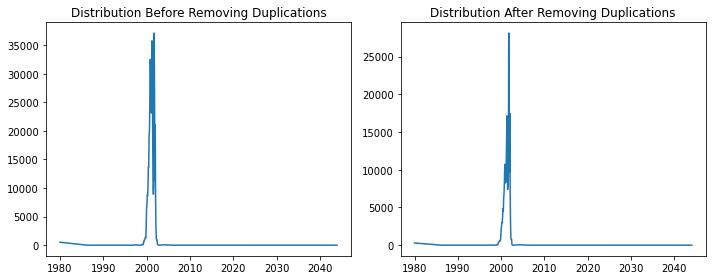

In [63]:

def show_dist_plot(df2):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    df2['Date'] = pd.to_datetime(df2['Date'],utc=True)

    df2['YearMonth'] = df2['Date'].dt.to_period('M').apply(lambda x: x.to_timestamp())
    YearMonth_df = df2.groupby('YearMonth').size().reset_index(name='EmailsSent')
    ax1.plot(YearMonth_df['YearMonth'], YearMonth_df['EmailsSent'])
    ax1.set_title('Distribution Before Removing Duplications')

    cols = df2.columns.tolist()
    cols.remove('Message-ID')
    duplicate_mask = df2.duplicated(subset=cols)
    df2 = df2[~duplicate_mask].reset_index(drop=True)

    YearMonth_df = df2.groupby('YearMonth').size().reset_index(name='EmailsSent')




    # Plot data on the second subplot
    ax2.plot(YearMonth_df['YearMonth'], YearMonth_df['EmailsSent'])
    ax2.set_title('Distribution After Removing Duplications')

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the figure
    plt.show()

show_dist_plot(df2.copy())



The distribution of the email count over time remains unchanged, further validating our hypothesis.

In [64]:
#Removing duplicated rows (emails)
print(f'Size before removing duplications: {len(df2)}')
cols = df2.columns.tolist()
cols.remove('Message-ID')
duplicate_mask = df2.duplicated(subset=cols)
df2 = df2[~duplicate_mask].reset_index(drop=True)
print(f'Size after removing duplications: {len(df2)}')

Size before removing duplications: 517398
Size after removing duplications: 256239


Approximatly half of the emails are duplicated! 

### Fixing 'Cc' and 'Bcc'

Considering our previous discussion, it was observed that while some emails contain 'Bcc' and/or 'Cc' fields, the majority of emails do not. To address this, we will rectify the situation by adding these two columns to our dataframe.

In [65]:
#EXAMPLES
counter = 0
for i in range(len(df2)):
  if counter ==2:
    break
  if 'Cc' in df2.loc[i,'Subject']:
    counter += 1
    print(df2.loc[i])
print('///////')
counter = 0
for i in range(len(df2)):
  if counter ==2:
    break
  if 'Bcc' in df2.loc[i,'Content-Transfer-Encoding']:
    counter += 1
    print(df2.loc[i])



Message-ID                       <12599900.1075855689029.JavaMail.evans@thyme>
Date                                     Fri, 25 Aug 2000 03:30:00 -0700 (PDT)
From                                                   phillip.allen@enron.com
To                                                     brad.mcsherry@enron.com
Subject                      Cc: john.lavorato@enron.com, hunter.shively@en...
Mime-Version                                                               1.0
Content-Type                                      text/plain; charset=us-ascii
Content-Transfer-Encoding    7bit\nBcc: john.lavorato@enron.com, hunter.shi...
X-From                                                         Phillip K Allen
X-cc                                         John J Lavorato, Hunter S Shively
X-bcc                                                                         
Body                         Brad, With regard to Tori Kuykendall, I would ...
Name: 86, dtype: object
Message-ID                  

In [66]:
'''
ONE-TIME CODE: comment if you run the code for more than ONCE
'''
df2.insert(5, 'Cc', '')
df2.insert(9, 'Bcc', '')
df2.head()

Message-ID  \
0  <18782981.1075855378110.JavaMail.evans@thyme>   
1  <15464986.1075855378456.JavaMail.evans@thyme>   
2  <24216240.1075855687451.JavaMail.evans@thyme>   
3  <13505866.1075863688222.JavaMail.evans@thyme>   
4  <30922949.1075863688243.JavaMail.evans@thyme>   

                                    Date                     From  \
0  Mon, 14 May 2001 16:39:00 -0700 (PDT)  phillip.allen@enron.com   
1   Fri, 4 May 2001 13:51:00 -0700 (PDT)  phillip.allen@enron.com   
2  Wed, 18 Oct 2000 03:00:00 -0700 (PDT)  phillip.allen@enron.com   
3  Mon, 23 Oct 2000 06:13:00 -0700 (PDT)  phillip.allen@enron.com   
4  Thu, 31 Aug 2000 05:07:00 -0700 (PDT)  phillip.allen@enron.com   

                        To    Subject Cc Mime-Version  \
0     tim.belden@enron.com                        1.0   
1  john.lavorato@enron.com        Re:             1.0   
2   leah.arsdall@enron.com   Re: test             1.0   
3    randall.gay@enron.com                        1.0   
4     greg.piper@enron.com  Re: Hello             1.0   

                   Content-Type Content-Transfer-Encoding Bcc  \
0  text/plain; charset=us-ascii                      7bit       
1  text/plain; charset=us-ascii                      7bit       
2  text/plain; charset=us-ascii                      7bit       
3  text/plain; charset=us-ascii                      7bit       
4  text/plain; charset=us-ascii                      7bit       

            X-From X-cc X-bcc  \
0  Phillip K Allen              
1  Phillip K Allen              
2  Phillip K Allen              
3  Phillip K Allen              
4  Phillip K Allen              

                                                Body  
0                              Here is our forecast   
1  Traveling to have a business meeting takes the...  
2                     test successful.  way to go!!!  
3  Randy, Can you send me a schedule of the salar...  
4                Let's shoot for Tuesday at 11:45.

In [67]:
df2['Cc'] = df2['Subject'].apply(lambda x: x.split('Cc:')[1] if 'Cc:' in x else '' )
df2['Subject'] = df2['Subject'].apply(lambda x: x.split('Cc:')[0].replace('\n', '') if 'Cc:' in x else x)

df2['Bcc'] = df2['Content-Transfer-Encoding'].apply(lambda x: x.split('Bcc:')[1] if 'Bcc:' in x else '')
df2['Content-Transfer-Encoding'] = df2['Content-Transfer-Encoding'].apply(lambda x: x.split('Bcc:')[0].replace('\n', '') if 'Bcc:' in x else x)


In [68]:
df2[df2['Bcc']!='']

Message-ID  \
86      <12599900.1075855689029.JavaMail.evans@thyme>   
128      <9496454.1075855378828.JavaMail.evans@thyme>   
172     <12558609.1075855378931.JavaMail.evans@thyme>   
265     <21889760.1075855692557.JavaMail.evans@thyme>   
267      <8610882.1075855692600.JavaMail.evans@thyme>   
...                                               ...   
256164  <15205398.1075842036502.JavaMail.evans@thyme>   
256176  <20351161.1075842028492.JavaMail.evans@thyme>   
256192  <12099366.1075842028905.JavaMail.evans@thyme>   
256210    <537849.1075842029343.JavaMail.evans@thyme>   
256214  <11108760.1075842029437.JavaMail.evans@thyme>   

                                         Date                     From  \
86      Fri, 25 Aug 2000 03:30:00 -0700 (PDT)  phillip.allen@enron.com   
128     Fri, 27 Apr 2001 13:02:00 -0700 (PDT)  phillip.allen@enron.com   
172     Wed, 25 Apr 2001 18:57:00 -0700 (PDT)  phillip.allen@enron.com   
265     Mon, 17 Jan 2000 00:47:00 -0800 (PST)  phillip.allen@enron.com   
267     Thu, 13 Jan 2000 02:30:00 -0800 (PST)  phillip.allen@enron.com   
...                                       ...                      ...   
256164  Wed, 13 Jun 2001 07:19:27 -0700 (PDT)  john.zufferli@enron.com   
256176  Thu, 24 Jan 2002 14:00:42 -0800 (PST)  john.zufferli@enron.com   
256192  Fri, 18 Jan 2002 06:52:25 -0800 (PST)  john.zufferli@enron.com   
256210   Mon, 7 Jan 2002 13:01:08 -0800 (PST)  john.zufferli@enron.com   
256214  Fri, 21 Dec 2001 12:34:51 -0800 (PST)  john.zufferli@enron.com   

                                     To                        Subject  \
86              brad.mcsherry@enron.com                                  
128           tim.heizenrader@enron.com                                  
172               ned.higgins@enron.com        Re: Unocal WAHA Storage   
265             tara.sweitzer@enron.com                                  
267     brenda.flores-cuellar@enron.com                            eol   
...                                 ...                            ...   
256164          john.lavorato@enron.com  Beginning of year power marks   
256176           greg.whalley@enron.com     Canadian function currency   
256192           kathy.reeves@enron.com            Functional Currency   
256210       livia_zufferli@monitor.com                            RE:   
256214    karen.mazuryk@powerpool.ab.ca            Lethbrige Ironworks   

                                                       Cc Mime-Version  \
86       john.lavorato@enron.com, hunter.shively@enron...          1.0   
128                                  tim.belden@enron.com          1.0   
172                                mike.grigsby@enron.com          1.0   
265                       brenda.flores-cuellar@enron.com          1.0   
267                                 dale.neuner@enron.com          1.0   
...                                                   ...          ...   
256164                          kimberly.hillis@enron.com          1.0   
256176                            rob.milnthorp@enron.com          1.0   
256192                            rob.milnthorp@enron.com          1.0   
256210                                  jzufferli@shaw.ca          1.0   
256214                             katrina@valeopower.com          1.0   

                        Content-Type Content-Transfer-Encoding  \
86      text/plain; charset=us-ascii                      7bit   
128     text/plain; charset=us-ascii                      7bit   
172     text/plain; charset=us-ascii                      7bit   
265     text/plain; charset=us-ascii                      7bit   
267     text/plain; charset=us-ascii                      7bit   
...                              ...                       ...   
256164  text/plain; charset=us-ascii                      7bit   
256176  text/plain; charset=us-ascii                      7bit   
256192  text/plain; charset=us-ascii                      7bit   
256210  text/plain; charset=us-

### Reformatting

As observed in previous info table, the type of each column is currently set as 'object'. For certain columns where we have prior knowledge of their expected type, such as 'Date', it would be beneficial to convert the type from the generic 'object' type to the appropriate type.
<br><br>
Additionally, there are other columns, like 'To' and 'From', which are expected to contain email addresses. We can validate the format of these columns using regular expressions (regex) to ensure they adhere to the expected format.
<br><br>

By performing these type conversions and format validations, we can enhance the consistency and accuracy of the data in our dataframe.

In [69]:
def check_email_string(string):
    email_pattern = r'^[\w\'.&+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$'
    match = re.match(email_pattern, string)
    return match is not None

 #Of format "TEXT<.EMAIL>"
def extract_valid_email(string):
    email_pattern = r'<\.(.+)>'
    match = re.search(email_pattern, string)
    if match:
        valid_email = match.group(1)
        return valid_email
    else:
        return None

def get_reformatted_emails(text):
    froms = ''.join(text.split()).split(',') 

    new_froms = ''
    for _from in froms:
      if check_email_string(_from):
        if new_froms!='':
          new_froms+=','+_from
        else:
           new_froms+=_from
      else:
        extracted = extract_valid_email(_from)
        if extracted:
          if new_froms!='':
            new_froms+=','+extracted
          else:
            new_froms+=extracted
    return new_froms



df2['From'] = df2['From'].apply(lambda x: get_reformatted_emails(x))
df2['To'] = df2['To'].apply(lambda x: get_reformatted_emails(x))

df2['Bcc'] = df2['Bcc'].apply(lambda x: get_reformatted_emails(x))
df2['Cc'] = df2['Cc'].apply(lambda x: get_reformatted_emails(x))






In [70]:
df2[df2['Cc'].str.contains(',')].index
df2.loc[86]

Message-ID                       <12599900.1075855689029.JavaMail.evans@thyme>
Date                                     Fri, 25 Aug 2000 03:30:00 -0700 (PDT)
From                                                   phillip.allen@enron.com
To                                                     brad.mcsherry@enron.com
Subject                                                                       
Cc                            john.lavorato@enron.com,hunter.shively@enron.com
Mime-Version                                                               1.0
Content-Type                                      text/plain; charset=us-ascii
Content-Transfer-Encoding                                                 7bit
Bcc                           john.lavorato@enron.com,hunter.shively@enron.com
X-From                                                         Phillip K Allen
X-cc                                         John J Lavorato, Hunter S Shively
X-bcc                                               

The above example made me thinking "How many emails have the same 'Cc' and 'Bcc' mailing lists?"

In [71]:
print(len(df2[df2['Bcc']==df2['Cc']]))
print(len(df2))

256239
256239


Another column joined the 'Dropping Club' 😀 (I will get rid of 'Bcc' and keep 'Cc'). Alongside we are going to drop the other columns we don't need ('Mime-Version', 'Content-Type' and 'Content-Transfer-Encoding')

In [72]:
df2 = df2.drop(['Bcc','Mime-Version', 'Content-Type' , 'Content-Transfer-Encoding','X-cc','X-bcc'],axis=1)



---



Some emails are forwarded. Forwarded emails have '------------- Forwarded' in thier body. Based on this, we can mark each email as forwarded or not.

In [73]:
df2["Forwarded"] = df2["Body"].str.contains("------------- Forwarded")

Some emails are replies to another emails. Reply emails have "RE:" in their Subject field. Based on this, we can mark each email as a reply or not.

In [74]:
df2["isReply"] = (df2["Subject"].str.contains("Re:")) | (df2["Subject"].str.contains("RE:"))


### Date Reformatting

I will change the format of the Date from string to DateTime, because we are going to use it intensively in the next sections

In [75]:
df2['Date'] = pd.to_datetime(df2['Date'],utc=True)
print(df2["Date"].describe())

count                        256239
unique                       224121
top       2001-06-27 23:02:00+00:00
freq                           1118
first     1980-01-01 00:00:00+00:00
last      2044-01-04 22:48:58+00:00
Name: Date, dtype: object


It appears that we have encountered some outliers in the dataset. Considering that Enron was established on July 16th, 1985, and defunct on March 1st, 2007, we should filter the data to include only records that fall within this range of dates. By applying this filter, we can ensure that the dataset consists of relevant records that align with the timeline of Enron's existence.

In [76]:
df2 = df2[(df2['Date']>='1985-07-16') & (df2['Date']<='2007-03-01')]

## Data Exploration

I will divide this section into three subsections to provide a comprehensive analysis:
<br>
1- Emails Overview Info: In this subsection, we will dive deeper into the categories of the emails, their distribution, and other relevant information.
<br>
2- Time Series Analysis: Here, we will explore the emails over time, aiming to uncover interesting patterns or trends.
<br>
3- People Sending Behavior: This subsection will focus on analyzing how people send emails, including their sending patterns in terms of time, frequency, and volume. We will aim to uncover intriguing insights about email sending habits.
<br>
4- People Network: This subsection will involve exploring the network of people who sent emails to each other, identifying connections and relationships between individuals.
<br>
5- Sentiment Analysis: Lastly, we will conduct a simple sentiment analysis on the email bodies to gain insights into how people generally compose their emails.
<br><br>
**Please Note** that throughout the analysis, I have utilized various visualization libraries such as Matplotlib, Seaborn, and Plotly. While Plotly is predominantly used due to its interactivity, providing readers with additional information through interaction, I have also employed other libraries to present simple graphs where appropriate. This combination allows for a balanced presentation of static and interactive visualizations, enhancing the reader's understanding of the data.

### Emails Overview Info

In [77]:
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles
import plotly.express as px
import calendar
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS


plt.rcParams['axes.facecolor'] = 'white'
df3 = df2.copy()


Let's show a nice table to see some overview information about our data

In [78]:
desc_table = df2.drop(['Message-ID','Date'],axis=1).describe(include='all').T
#desc_table = df2.describe(include='all').T
desc_table = desc_table.reset_index()
desc_table = desc_table.rename(columns={'index':'Header'})
layout = go.Layout(
  margin=go.layout.Margin(
        l=0, #left margin
        r=0, #right margin
        b=0, #bottom margin
        t=0  #top margin
    )
)
layout.height = 190
fig = go.Figure(data=[go.Table(
    header=dict(values=list(desc_table.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=desc_table.transpose().values.tolist(),
               fill_color='lavender',
               align='left'))],layout=layout)
fig.show()



Upon analysis, it is evident that there is a significant number of emails that fall into the categories of being forwarded or replies. In the upcoming subsection, we will dive deeper into these two categories to gain a better understanding of their characteristics and patterns.
<br><br>
However, it is important to note that there are also emails that serve as both forwards and replies. These particular emails represent an additional category.
<br><br>
By examining these three categories of emails—forwarded, replies, and a combination of both—we can gain valuable insights into the communication dynamics within the dataset.

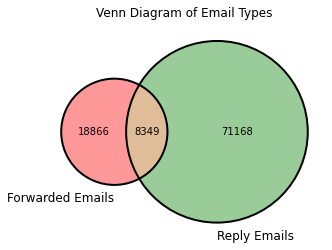

In [79]:
forwarded_emails = len(df3[(df3['Forwarded'] == True) & (df3['isReply'] == False)])
# Count the number of reply emails
reply_emails = len(df3[(df3['isReply'] == True) & (df3['Forwarded'] == False)])

# Count the number of emails that are both replies and forwarded
both_emails = len(df3[(df3['Forwarded'] == True) & (df3['isReply'] == True)])
plt.figure( facecolor="white")

# Create the Venn diagram
venn2(subsets=(forwarded_emails, reply_emails, both_emails),
      set_labels=('Forwarded Emails', 'Reply Emails'))

# Add circle outlines
venn2_circles(subsets=(forwarded_emails, reply_emails, both_emails))

# Display the plot
plt.title('Venn Diagram of Email Types')

plt.show()

Through my data cleaning process, I found some emails sent from/to people which are not employees of Enron. We will consider this category as will.<br>
So far we have 5 categories of emails:<br>
1- Normal emails<br>
2- Forwarded emails<br>
3- Reply emails<br>
4- Forwarded and Reply emails<br>
5- Emails sent to/from non-employees<br>
I found that the best chart to show the distribution of these categories is a Sunburst chart.


In [80]:
df_only_forwarded = df3[(df3['Forwarded']==True) & (df3['isReply']==False)]
df_only_reply = df3[(df3['isReply']==True) & (df3['Forwarded']==False)]
df_forwarded_and_reply = df3[(df3['Forwarded']==True) & (df3['isReply']==True)]
df_normal = df3[(df3['Forwarded']==False) & (df3['isReply']==False)]

df_only_forwarded_company = df_only_forwarded[df_only_forwarded['From'].str.contains('enron')]
df_only_reply_company = df_only_reply[df_only_reply['From'].str.contains('enron')]
df_forwarded_and_reply_company = df_forwarded_and_reply[df_forwarded_and_reply['From'].str.contains('enron')]
df_normal_company = df_normal[df_normal['From'].str.contains('enron')]


df_only_forwarded_not_company = df_only_forwarded[~df_only_forwarded['From'].str.contains('enron')]
df_only_reply_not_company = df_only_reply[~df_only_reply['From'].str.contains('enron')]
df_forwarded_and_reply_not_company = df_forwarded_and_reply[~df_forwarded_and_reply['From'].str.contains('enron')]
df_normal_not_company = df_normal[~df_normal['From'].str.contains('enron')]


data = dict(
    type=['All Emails','Forwarded','Reply','Forwarded and Reply','Normal','Forwarded (Enron)','Reply (Enron)','Forwarded and Reply (Enron)','Normal (Enron)','Forwarded (Not Enron)','Reply (Not Enron)','Forwarded and Reply (Not Enron)','Normal (Not Enron)'],
    parent=['', 'All Emails', 'All Emails', 'All Emails', 'All Emails', 'Forwarded', 'Reply', 'Forwarded and Reply', 'Normal', 'Forwarded', 'Reply', 'Forwarded and Reply', 'Normal'],
    value=[len(df3), len(df_only_forwarded), len(df_only_reply), len(df_forwarded_and_reply), len(df_normal), len(df_only_forwarded_company), len(df_only_reply_company), len(df_forwarded_and_reply_company), len(df_normal_company), len(df_only_forwarded_not_company), len(df_only_reply_not_company), len(df_forwarded_and_reply_not_company), len(df_normal_not_company)])



fig = px.sunburst(
    data,
    names='type',
    parents='parent',
    values='value',
    branchvalues="total",
    title='Emails Types Distribution (Interactive)',
)
fig.update_layout(margin = dict(t=30, l=0, r=0, b=0))

fig.show()

To determine the most common words in the email bodies, we can utilize a word cloud visualization. The word cloud will provide a visual representation where the size of each word corresponds to its frequency in the email bodies. This will allow us to gain insights into the overall content and prevalent themes of the emails.
<br><br>
In order to enhance the accuracy of the word cloud, I have compiled a list of common words to be excluded, known as stopwords. These stopwords consist of words that are frequently used in the emails but do not contribute meaningful information. For instance, words like 'TD', 'hou', and 'IMAGE' have been identified as stopwords based on their repetitive occurrence without offering substantial insights.
<br><br>
By applying this approach, we can generate a word cloud that effectively highlights the most significant and informative terms, providing valuable perspective on the content of the emails.

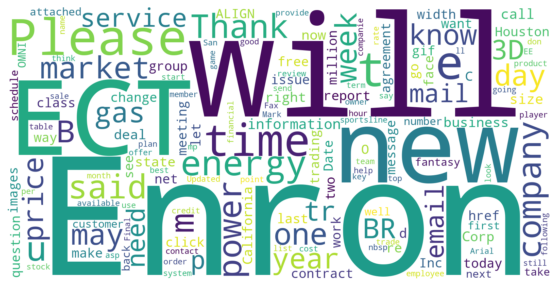

In [81]:


tokenizer = RegexpTokenizer(r'\w+')
stopwords = set(STOPWORDS)
to_add = ['FW', 'ga', 'cc', 's','a','TD',
         'hou', 'cc', 'etc', 'subject', 'pm','IMAGE','font','-----Original Message-----']

for i in to_add:
    stopwords.add(i)
df_temp = df3[(df3['Forwarded']==False) ]
df_temp['Body'] = df_temp['Body'].apply(lambda x: x.split('-----')[0])
words_descriptions = df_temp['Body'].apply(tokenizer.tokenize) ## will use also later on sentiment analysis
all_words = [word for tkns in words_descriptions for word in tkns ]
text = ' '.join(all_words)
wordcloud = WordCloud(collocations = False,
                          width=1600, height=800,
                          background_color='white',
                          stopwords=stopwords,
                          max_words=150,
                          #max_font_size=40, 
                          random_state=42).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Based on the analysis of the word cloud, we can draw several conclusions regarding the content and tone of the emails:
<br><br>
1- Politeness: The frequent use of the word "please" suggests that individuals in these email conversations exhibit a polite and courteous communication style.
<br><br>
2- Future Plans: The prevalence of the word "will" indicates that discussions often revolve around future plans, indicating a forward-looking aspect in the email conversations.
<br><br>
3- Gratitude: The frequent use of the word "thanks" implies that expressing gratitude is a common practice among the email correspondents, highlighting a sense of appreciation in their interactions.
<br><br>

It is important to note that drawing further conclusions from the word cloud requires contextual understanding of the other words used in the emails. The presented findings provide insights into general themes but do not capture the entire complexity of the email content. To gain a comprehensive understanding, considering the context and nuances within the emails is crucial.

### Time Series Analysis

In this section, we will delve into the analysis of emails over time, aiming to answer several key questions. These questions include:
<br><br>
1- Monthly Email Count: We will determine the number of emails sent in each month, providing insights into the overall email activity throughout the dataset.
<br><br>
2- Day of the Week Email Count: By examining the number of emails sent on each day of the week, we can identify any patterns or variations in email communication based on weekdays.
<br><br>
3- Time of the Day Email Count: Analyzing the distribution of emails sent during different times of the day (such as morning, afternoon, evening) will allow us to understand the preferences and trends in email communication throughout the day.
<br><br>
4- Employee vs. Non-Employee Email Count: We will differentiate between emails sent by employees and non-employees, providing an understanding of the email contribution from each group.
<br><br>
Additionally, as we explore the data further, additional questions and insights may emerge, leading to a more comprehensive understanding of email patterns and behaviors within the dataset.

---

The provided charts display the number of emails sent over the years (first chart) and the distribution of emails across months and years (second chart). It is notable that there is a significant spike in the number of emails sent in October 2001, with over 28,000 emails recorded during that month.
<br><br>
This observation aligns with the timing of Enron's bankruptcy filing, which occurred two months later in December 2001. It is possible that the increased email activity during this period is attributed to the events leading up to and following the bankruptcy filing. The regulatory entity responsible for collecting these emails may have placed particular emphasis on this time frame, which is closer to the bankruptcy date, as it holds significant relevance and importance.
<br><br>
The concentration of email communication during the years 1999 to 2002 could be indicative of heightened interest and scrutiny during that period, potentially driven by the circumstances surrounding Enron's financial collapse and subsequent investigations.

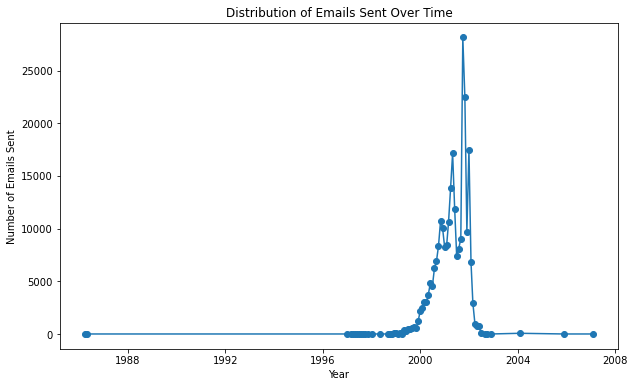

In [82]:
import plotly.graph_objects as go

df3['YearMonth'] = df3['Date'].dt.to_period('M').apply(lambda x: x.to_timestamp())
YearMonth_df = df3.groupby('YearMonth').size().reset_index(name='EmailsSent')
YearMonth_df['Year'] = YearMonth_df['YearMonth'].dt.year
YearMonth_df['Month'] = YearMonth_df['YearMonth'].dt.month
plt.figure(figsize=(10, 6))
plt.plot(YearMonth_df['YearMonth'], YearMonth_df['EmailsSent'], marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Emails Sent')
plt.title('Distribution of Emails Sent Over Time')
plt.xticks(x='Year')
plt.show()
################################################################

##To be able to show the exact amount of emails sent in each month
fig = px.line(YearMonth_df, x='YearMonth', y='EmailsSent', title='Distribution of Emails Sent Over Time (Interactive)')
fig.show()





The provided histogram charts illustrate the distribution of emails sent by two distinct groups: company employees and non-employees. The first chart showcases the overall email distribution over time, similar to the previous chart. However, in this chart, we can also observe the distribution of emails sent by non-employees alongside those sent by employees.
<br><br>
It is evident that the number of emails sent by employees significantly outweighs the number sent by non-employees, indicating that employee communication constitutes the majority of the dataset. However, an interesting observation emerges when considering the emails sent by non-employees. In particular, during the year 2001, which coincides with Enron's bankruptcy filing, the number of emails sent by non-employees appears relatively substantial compared to other years. This could suggest that external stakeholders, such as regulators or individuals involved in the bankruptcy proceedings, played a more active role in email communication during that critical period.
<br><br>
The top bar of the chart represents the distribution of emails across the months, providing additional insights into the temporal patterns of email activity.

---

The second histogram chart focuses specifically on the distribution of emails sent by employees and non-employees across the months. It confirms the observation made in the previous chart, highlighting that both groups experience a peak in email activity during the months of October and November.

In [83]:
month_mapping = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}
df_month_dist = df3[['From','YearMonth']]
df_month_dist['Month']=df_month_dist['YearMonth'].dt.month
df_month_dist['Company'] = df_month_dist['From'].apply(lambda x: 'Enron' if 'enron' in x else 'Not Enron')
df_month_dist = df_month_dist[['Month','Company','YearMonth']]
group_month = df_month_dist.groupby(['Month','Company','YearMonth']).size().reset_index(name='EmailsSent')
group_month['Month']=group_month['Month'].map(month_mapping)
print(group_month['EmailsSent'].sum())
fig = px.histogram(group_month,labels={'YearMonth':'Month and Year','EmailsSent':'sent emails'} ,x='YearMonth', y="EmailsSent", color="Company", hover_data=['EmailsSent'], marginal="rug", 
             )
fig.show()

fig = px.histogram(group_month, x='Month', y="EmailsSent",title="Histogram of Emails Send Overtime By Employees/Non-Employees (Interactive)", color="Company", hover_data=group_month.columns, # can be `box`, `violin`
             )
fig.show()


255938


The provided Heatmap visualizes the number of emails sent over the years and months, offering a comprehensive view of the email activity patterns. A clear observation is the gradual increase in the number of emails from the beginning of 2000 until the start of 2002. However, it's worth mentioning that there are three months where the email volume seems to dip, which could be attributed to employees taking time off for vacations or holidays (July, August and September). Additionally, the month of December shows a decline, likely due to the Christmas holiday season.
<br><br>
However, what stands out as a notable trend is the subsequent sharp drop in email volume following the early months of 2002. This decline suggests a significant change in the email activity within Enron, aligning with the previous observations and indicating that there was a distinct focus on capturing and collecting emails during the period leading up to the bankruptcy filing.

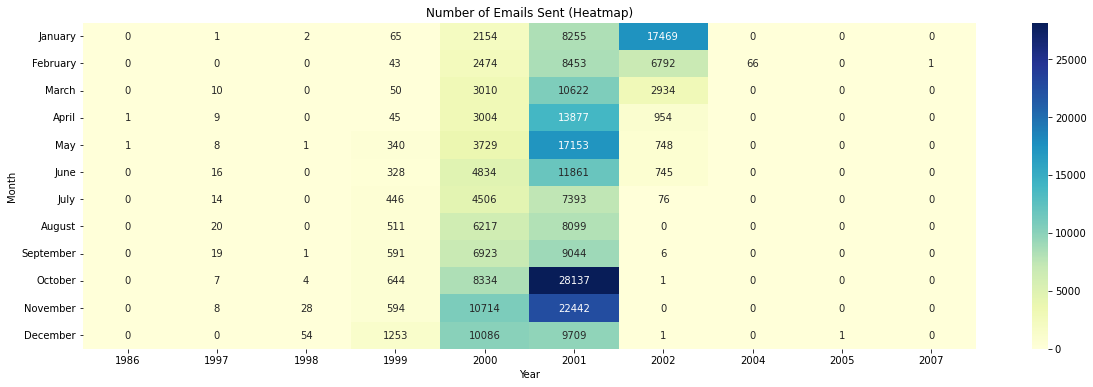

In [84]:
###########Heatmap######################
month_names = [calendar.month_name[i] for i in range(1, 13)]

pivot_df = YearMonth_df.pivot(index='Month', columns='Year', values='EmailsSent')
pivot_df = pivot_df.fillna(0)
pivot_df = pivot_df.astype(int)
plt.figure(figsize=(20, 6))  
sns.heatmap(pivot_df, annot=True, fmt='d', cmap='YlGnBu',yticklabels=month_names)

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Month')
plt.title('Number of Emails Sent (Heatmap)')

# Display the plot
plt.show()

### People Sending Behavior

In this subsection, we will dive into the sending behavior of individuals who sent emails, aiming to address several questions related to their email activity. Let's explore the following areas:
<br><br>
1- Time of the Day: We will determine the most active time of the day when people tend to send the most emails. This analysis will shed light on the peak periods of email communication.
<br><br>
2- Hourly Distribution: We will examine the distribution of email sending over the hours of the day. By visualizing this data, we can identify any specific patterns or trends in email activity throughout the day.
<br><br>
3- Top Email Senders: We will identify the individuals who sent the highest number of emails. This analysis will help us understand the most prolific email senders within the dataset.
<br><br>
4- Email Frequency: We will analyze the frequency of email sending for each individual. By examining the rate at which emails were sent by different individuals, we can gain insights into their communication patterns.
<br><br>
5- Group Emailing: We will explore which individuals sent emails to small or large groups of recipients. This analysis will provide insights into the extent of group communication and identify any notable trends or patterns in the recipients' size.
<br><br>
By investigating these aspects of email sending behavior, we can gain a deeper understanding of how individuals within Enron engaged in email communication, their preferred timeframes, and their communication patterns with various recipient groups.

---

In the bar chart depicting the distribution of email sending over hours of the day, several interesting patterns emerge. The majority of emails are sent between 8:00 and 18:00, which aligns with typical working hours. Notably, there is a peak in email activity between 12:00 and 18:00, which can be attributed to individuals returning from their lunch break and finding it more convenient to engage in email communication during this time.
<br><br>
Another intriguing observation is that the number of emails sent between 18:00 and 24:00 is higher than the number sent between 08:00 and 12:00. This could be indicative of individuals working during evening hours, possibly to catch up on pending tasks or engage in after-hours work. Additionally, some individuals may choose to check their emails before retiring for the night, leading to increased activity during this timeframe.
<br><br>
Overall, the distribution of email sending over the hours of the day reflects typical working patterns, with a peak during the afternoon and a notable presence of email activity outside traditional working hours.

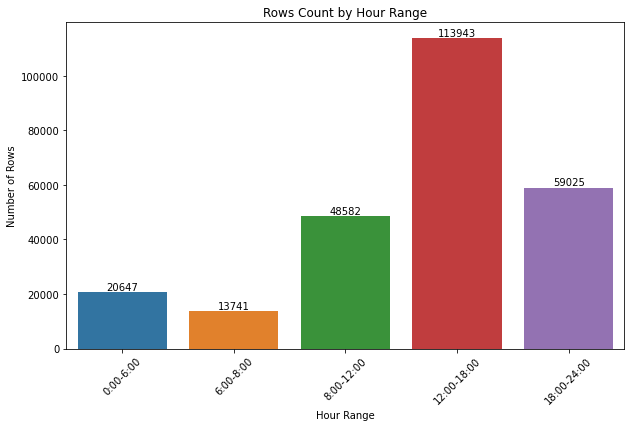

In [85]:


hour_ranges = [(0,6),(6,8),(8,12),(12,18),(18,24)]
df3['Hour Range'] = pd.cut(df3['Date'].dt.hour, bins=[0,6,8,12,18,24], labels=[f"{start}:00-{end}:00" for (start, end) in hour_ranges], include_lowest=True)
grouped = df3.groupby('Hour Range').size().reset_index(name='Count')
plt.figure(figsize=(10, 6))
sns.barplot(x='Hour Range', y='Count', data=grouped)
for index, row in grouped.iterrows():
    plt.text(index, row['Count'], str(row['Count']), ha='center', va='bottom')
plt.xlabel('Hour Range')
plt.ylabel('Number of Rows')
plt.title('Rows Count by Hour Range')
plt.xticks(rotation=45)
plt.show()


The chart displaying the distribution of email sending by hour range in days of the week reveals interesting insights. The distribution remains relatively stable across weekdays, with consistent patterns observed. However, there is a notable increase in the number of emails sent between 00:00 and 06:00 on Saturdays.
<br><br>
This phenomenon can be attributed to individuals who may not have completed their work on Friday and choose to continue working late into the night, striving to finish pending tasks before dedicating time to leisure activities and spending time with their families during the weekend.
<br><br>
The heightened email activity during the early hours of Saturday suggests a segment of individuals who prioritize completing their work before enjoying their weekend, resulting in a distinctive spike in email sending during this timeframe.

In [86]:
plt.clf()
df3['DayOfWeek'] = df3['Date'].dt.day_name()
desired_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


fig = go.Figure()
# X and Y elements need to be in the same order
for i in df3['Hour Range'].unique():
    fig.add_trace(go.Bar(
        y=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
        x=df3[df3['Hour Range'] == i].groupby('DayOfWeek').size().reindex(desired_order),
        name=str(i),
        orientation='h',
     
    ))

fig.update_layout(barmode='stack', title='Distribution of Emails Sent by Hour Range in Each Day of Week (Interactive)')
fig.show()



<Figure size 432x288 with 0 Axes>

The presented bubble chart provides valuable insights regarding the email sending behavior of individuals within Enron. Let's analyze the key observations:
<br><br>
1- X-axis: The number of emails sent by each person.<br>
2- Y-axis: The number of recipients to whom each person sends emails.<br>
3- Size of the bubble: Represents the frequency of email sending (measured in emails per month) for each person.<br>
4- Color of the bubble: Indicates whether the person is an employee of Enron or not.<br><br>

One significant finding is the presence of individuals who exhibit a high number of sent emails but maintain a relatively small recipient group (higher values on the X-axis and lower values on the Y-axis). These individuals are likely to hold important positions within the company, such as decision-makers. Their reduced need to communicate with a large number of recipients suggests their role in informing a select group of individuals about the decisions they have made. In contrast, those who send the most emails are not necessarily decision-makers but rather individuals responsible for executing decisions.
<br><br>
Furthermore, a clear correlation can be observed between the number of sent emails and the frequency of sending emails. The size of the bubbles gradually increases from left to right, indicating that individuals who send a larger volume of emails also tend to send them more frequently.
<br><br>
By considering these observations, we gain insights into the communication dynamics within Enron, highlighting the roles and responsibilities of different individuals based on their email sending patterns.

In [87]:
df3['To'] = df3['To'].apply(lambda x: x.split(','))

In [88]:
df_new = pd.DataFrame()



df_new['To'] = df3.groupby('From')['To'].agg(list)
df_new['To'] = df_new['To'].apply(lambda x: list(set([item for sublist in x for item in sublist if item!=''])))
df_new.reset_index(inplace=True)
df_new['Number of sent emails'] = df_new['From'].map(df3['From'].value_counts())
df_new['Number of recipients'] = df_new['To'].apply(lambda x: len(x))
df_new['Frequency'] = round(df_new['Number of sent emails'] /78,1) # number of monthes between 1998 and 2004
df_new['isEnron'] = df_new['From'].str.contains('enron')

fig = px.scatter(df_new, x='Number of sent emails', y="Number of recipients",
	         size="Frequency", color="isEnron",hover_data=['Frequency','Number of sent emails','Number of recipients'],
                 hover_name="From",log_x=True, size_max=30,height=600,width=1000)
fig.update_layout(title="Number of sent emails vs Number of recipients (Bubble size = Frequency (emails/month))")

fig.show()


### People Network

**Disclaimer:** Plotting the complete network of all individuals within Enron is a complex task due to the large number of people and the potential for numerous email connections. The resulting network visualization would likely be cluttered and challenging to interpret, while also requiring substantial computational resources and time.
<br><br>
To address these challenges, I have implemented a sampling approach for plotting the network. The variables used for sampling can be adjusted at the beginning of the code cell, allowing the reader to modify them as desired. This flexibility enables the exploration of different subsets of the network based on specific criteria or interests.
<br><br>
By using this sampling technique, we can gain insights into the broader patterns of communication between individuals within Enron while maintaining visual clarity and ensuring a reasonable computation time.

---

The network chart provides an overview of the communication patterns between individuals within Enron. Each node represents an employee, and the edges indicate that at least one email was exchanged between the corresponding individuals.
<br><br>
From the chart, we can observe that the network is composed of several connected subgraphs. These subgraphs likely represent teams or groups of individuals who frequently communicate with each other. However, due to the limitations of the sample size, it is challenging to determine the specific teams or groups represented by each subgraph.
<br><br>
It's important to note that the sample may not capture the entire network structure of Enron, as it is a subset of the complete dataset. Therefore, any conclusions drawn from the network visualization should be interpreted with caution. Nonetheless, the chart provides a visual representation of the overall communication patterns within Enron and highlights the presence of interconnected groups of individuals.<br>
(To zoom in to a subgraph for further visualization, click and drag the mouse over the desired area)

In [89]:
import networkx as nx
graph = nx.Graph()
'''
The DataFrame is sorted by the number of recipients, in descending order.
You can choose from which row to which row you want to get the senders.
In the default case, we will get 50 senders, from row 950 to 1000.
'''
senders_from_row = 950
senders_to_row = 1000


df_new.sort_values(by='To',key=lambda x: x.str.len(), inplace=True, ascending=False)
for i, elrow in df_new[senders_from_row:senders_to_row].iterrows():
    if elrow[0] not in graph:
        graph.add_node(elrow[0],size=1)
    for l in elrow[1]:
        if l not in graph:
            email_len = df_new[df_new['From']==l]['Number of sent emails'].values
            graph.add_node(l,size=1)
            graph.add_edge(elrow[0],l, weight=1)


pos_ = nx.spring_layout(graph)

def make_edge(x, y, text, width):
    return  go.Scatter(x         = x,
                       y         = y,
                       line      = dict(width = width,
                                   color = 'cornflowerblue'),
                       hoverinfo = 'text',
                       text      = ([text]),
                       mode='lines'
                       )
edge_trace = []
for edge in graph.edges():
    
    if graph.edges()[edge]['weight'] > 0:
        char_1 = edge[0]
        char_2 = edge[1]
        x0, y0 = pos_[char_1]
        x1, y1 = pos_[char_2]
        text   = str(graph.edges()[edge]['weight'])  
        trace  = make_edge([x0, x1, None], [y0, y1, None], 'fdsf', 
                           width = graph.edges()[edge]['weight'])
        edge_trace.append(trace)


node_trace = go.Scatter(x         = [],
                        y         = [],
                        text      = [],
                        textposition = "top center",
                        textfont_size = 10,
                        mode      = 'markers',
                        hoverinfo = 'text',
                        marker    = dict(color = [],
                                         size  = [],
                                         line  = None))
# For each node in midsummer, get the position and size and add to the node_trace
for node in graph.nodes():
    x, y = pos_[node]
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
    node_trace['marker']['color'] += tuple(['cornflowerblue'])
    node_trace['marker']['size'] += tuple([5*graph.nodes()[node]['size']])
    node_trace['text'] += tuple([node])





# Create figure
fig = go.Figure()
# Add all edge traces
for trace in edge_trace:
    fig.add_trace(trace)
# Add node trace
fig.add_trace(node_trace)
# Remove legend
fig.update_layout(showlegend = False)
fig.update_layout(title='Network Graph of Emails Sent Between Employees (Interactive Sample)')
# Remove tick labels
fig.update_xaxes(showticklabels = False)
fig.update_yaxes(showticklabels = False)
# Show figure
fig.show()


The Sankey graph provides a visual representation of the flow of emails between individuals within Enron. The thickness of the lines indicates the volume of emails exchanged between two individuals.

From the graph, we can observe that the flow of emails is not symmetric, indicating that certain individuals sent emails to others, but did not receive emails from them in return. This suggests a potential communication pattern where some individuals take on a more active role in initiating email conversations.

In this particular graph, the top 5 individuals who sent the most emails are highlighted. **It's important to note that this selection is based on the sample data and may not represent the top 5 individuals in the entire Enron network**. To capture a more comprehensive view of email flow and identify additional prolific senders, a larger sample or the complete dataset would be necessary.

The Sankey graph provides valuable insights into the email communication dynamics within the sample, showcasing the varying levels of email exchange between individuals.

In [90]:
# Modify the following variables to number of senders and recipients you want.
number_of_top_senders = 5 
recipients_per_sender = 20 #number of recipients per sender



# Get DF with sender-recipient for all emails
def countRecipients(row,df_new):
    _from = row['From']
    lst = row['To']
    if _from=='':
        return df_new
    for m in lst:
        df_new = df_new.append({'From':_from,'To':m},ignore_index=True)
    df_new.reset_index(drop=True)
    return df_new

def merge_emails_and_count():
    df = pd.DataFrame()
    df['To'] = df3.groupby('From')['To'].agg(list)
    df['To'] = df['To'].apply(lambda x: [item for sublist in x for item in sublist if item!=''])
    df.reset_index(inplace=True)
    df['Emails Count'] = df['To'].apply(len)
    df = df.sort_values(by='Emails Count')
    df.reset_index(inplace=True)
    return df


df_merged = merge_emails_and_count()
df_merged.sort_values(by='Emails Count',ascending=False,inplace=True)
#df_merged.reset_index(drop=True)

df_new = pd.DataFrame(columns=['From','To'])
for i, row in df_merged[:number_of_top_senders].iterrows():
  #print(i)
  df_new = countRecipients(row,df_new)


In [91]:
#print(df_new)
df_counts = df_new.groupby(['From','To']).size().reset_index(name='Count')

df_counts =df_counts.sort_values(by='Count',ascending=False)

# Use groupby and apply to select the desired number of rows for each group
df = df_counts.groupby('From').apply(lambda x: x.head(recipients_per_sender))

# Reset the index of the selected rows DataFrame
df = df.reset_index(drop=True)
# Create a list of unique nodes
nodes = list(set(df['From'].unique().tolist() + df['To'].unique().tolist()))

# Create a dictionary to map node names to indices
node_indices = {node: index for index, node in enumerate(nodes)}

# Create lists for sources, targets, and values
sources = [node_indices[node] for node in df['From']]
targets = [node_indices[node] for node in df['To']]
values = [val for val in df['Count']]  # Set the value to 1 for each link

# Create a Sankey trace
sankey_trace = go.Sankey(
    node=dict(
        label=nodes
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
    )
)

# Create a layout
layout = go.Layout(
    title='Email Sender-Receiver Network',
    font=dict(size=12),
    width=1000,  # Set the width of the figure
    height=1500 
)

# Create the figure and add the Sankey trace
fig = go.Figure(data=[sankey_trace], layout=layout)

# Show the figure
fig.show()

### Sentiment Analysis

The Pie chart represents the distribution of sentiments in a sample of 50,000 emails out of approximately 250,000 emails. The sentiments are categorized as positive, negative, and neutral.
<br><br>
Based on the sample data, we can observe that the majority of the emails fall into the neutral category. However, it's important to note that this distribution may not accurately reflect the sentiment distribution of the entire dataset of ~250,000 emails.
<br><br>
The sample size of 50,000 emails may not be sufficient to draw definitive conclusions about the sentiment distribution of the entire dataset. To obtain a more accurate representation, a larger sample or analysis of the complete dataset would be required.
<br><br>
Nonetheless, the Pie chart provides an initial glimpse into the sentiment distribution, suggesting that a significant portion of the emails in the sample are classified as neutral.

In [92]:
!pip install nltk

In [93]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ameerganeem/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


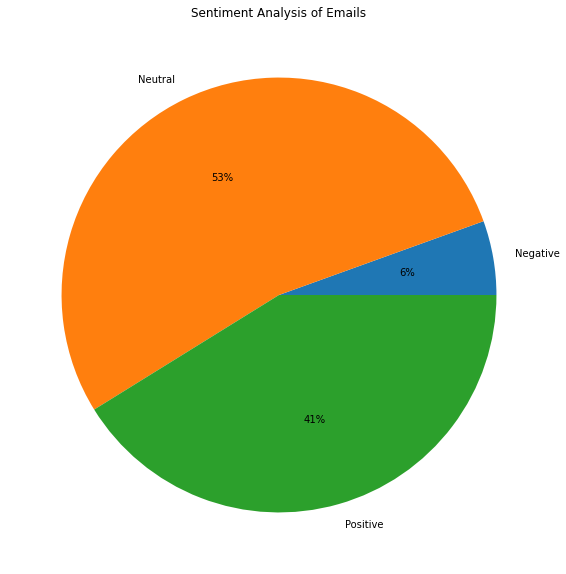

In [94]:

def get_sentiment(list_of_words):
    sentiment_scores = sid.polarity_scores(' '.join(list_of_words))
    return sentiment_scores['compound']

def get_result(scores):
    result = {'Negative':0,'Neutral':0,'Positive':0}
    for r in scores:
        if r>=0.01:
            result['Positive'] += 1
        if r<=-0.01:
            result['Negative'] += 1
        else:
            result['Neutral'] += 1
    
    return result;   



scores = words_descriptions[:50000].apply(get_sentiment)

result = get_result(scores)
plt.figure( facecolor="white",figsize=(10,10))
plt.title('Sentiment Analysis of Emails')
plt.pie(result.values(), labels=result.keys(), autopct='%.0f%%')
plt.show()




### Thank you for reading! I hope you enjoyed this project and found it insightful.<br>
Ameer Abu Ganeem